In [29]:

import numpy as np
import pickle
import matplotlib.pyplot as plt


In [30]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
 
 
def softmax(x):
    """ Standard definition of the softmax function """
    return np.exp(x) / np.sum(np.exp(x), axis=0)
 
 
def LoadBatch(filename):
    """ Copied from the dataset website """
    with open('Datasets/' + filename, 'rb') as fo:
        dataset_dict = pickle.load(fo, encoding='bytes')
 
    return dataset_dict
 
 
def ComputeGradsNum(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    c = ComputeCost(X, Y, W, b, lamda)
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
        grad_b[i] = (c2 - c) / h
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
            grad_w[i, j] = (c2 - c) / h
 
    return [grad_w, grad_b]
 
 
def ComputeGradsNumSlow(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] -= h
        c1 = ComputeCost(X, Y, W, b_try, lamda)
 
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
 
        grad_b[i] = (c2 - c1) / (2 * h)
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] -= h
            c1 = ComputeCost(X, Y, w_try, b, lamda)
 
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
 
            grad_w[i, j] = (c2 - c1) / (2 * h)
 
    return [grad_w, grad_b]
 
 
def montage(W):
    """ Display the image for each label in W """
    fig, ax = plt.subplots(2, 5)
    for i in range(2):
        for j in range(5):
            im = W[i * 5 + j, :].reshape(32, 32, 3, order='F')
            sim = (im - np.min(im[:])) / (np.max(im[:]) - np.min(im[:]))
            sim = sim.transpose(1, 0, 2)
            ax[i][j].imshow(sim, interpolation='nearest')
            ax[i][j].set_title("y=" + str(5 * i + j))
            ax[i][j].axis('off')
    plt.show()
 
 
def save_as_mat(data, name="model"):
    """ Used to transfer a python model to matlab """
    import scipy.io as sio
    sio.savemat(f'{name}.mat', {"name": "b"})


In [31]:
#Optional 1a

def load_all_batches(filenames):
    X, Y, y = [], [], []
    for filename in filenames:
        data = LoadBatch(filename)
        X.append(data[b'data'])
        Y.append(data[b'labels'])
        y.append(np.array(data[b'labels']).astype(np.int32))

    X = np.concatenate(X).astype(np.float32).T / 255
    Y = np.concatenate(Y).astype(np.int32)
    y = np.concatenate(y)

    Y_one_hot = np.zeros((10, Y.shape[0]), dtype=np.float32)
    for i, label in enumerate(Y):
        Y_one_hot[label, i] = 1

    return X, Y_one_hot, y + 1

def create_validation_set(X, Y, y, val_size=1000):
    indices = np.random.permutation(X.shape[1])
    train_X, val_X = X[:, indices[val_size:]], X[:, indices[:val_size]]
    train_Y, val_Y = Y[:, indices[val_size:]], Y[:, indices[:val_size]]
    train_y, val_y = y[indices[val_size:]], y[indices[:val_size]]

    return (train_X, train_Y, train_y), (val_X, val_Y, val_y)

In [32]:
# Load all batches
filenames = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
X, Y, y = load_all_batches(filenames)

# Create a validation set
(train_X, train_Y, train_y), (val_X, val_Y, val_y) = create_validation_set(X, Y, y)

#load test set
test_X, test_Y, test_y = load_all_batches(["test_batch"])



In [33]:
# assignment 1.2

def normalize_data(trainX, X):
    mean_X = np.mean(trainX, axis=1, keepdims=True)
    std_X = np.std(trainX, axis=1, keepdims=True)
    
    normalized_X = (X - mean_X) / std_X
    
    return normalized_X



In [34]:
trainX_norm = normalize_data(train_X, train_X)
valX_norm = normalize_data(train_X, val_X)
testX_norm = normalize_data(train_X, test_X)

In [35]:
#Optional 1b
import numpy as np

def flip_images(X):
    def flip_image(image):
        image = image.reshape(3, 32, 32)
        flipped_image = np.flip(image, axis=2)
        return flipped_image.flatten()

    for i in range(X.shape[1]):
        if np.random.rand() < 0.5:
            X[:, i] = flip_image(X[:, i])

    return X



In [36]:
#Assignment 1.3

def initialize_parameters(K, d):
    W = np.random.randn(K, d) * 0.01
    b = np.random.randn(K, 1) * 0.01
    return W, b



In [37]:
# Assignment 1.4

def EvaluateClassifier(X, W, b):
    s = np.dot(W, X) + b
    P = softmax(s)
    return P


In [38]:
# Assignment 1.5

def ComputeCost(X, Y, W, b, lambda_):
    P = EvaluateClassifier(X, W, b)
    cross_entropy_loss = -np.mean(np.sum(Y * np.log(P), axis=0))
    regularization_term = lambda_ * np.sum(W**2)
    J = cross_entropy_loss + regularization_term
    return J



In [39]:
# Assignment 1.6

def ComputeAccuracy(X, y, W, b):
    P = EvaluateClassifier(X, W, b)
    predictions = np.argmax(P, axis=0)
    correct_predictions = np.sum(predictions == (y - 1))
    acc = correct_predictions / y.shape[0]
    return acc

#accuracy = ComputeAccuracy(trainX_norm, train_y, W, b)
#print("Accuracy: {:.2%}".format(accuracy))

In [40]:
# Assignment 1.7

def ComputeGradients(X, Y, P, W, lambda_):
    n = X.shape[1]
    g = P - Y
    grad_W = (1/n) * np.dot(g, X.T) + 2 * lambda_ * W
    grad_b = (1/n) * np.sum(g, axis=1).reshape(-1, 1)
    return grad_W, grad_b

# Select a small portion of the data
X_small = trainX_norm[:20, :1]
Y_small = train_Y[:, :1]
W_small = W[:, :20]
b_small = b
lambda_ = 0

# Compute the analytical gradients
P_small = EvaluateClassifier(X_small, W_small, b_small)
grad_W_analytical, grad_b_analytical = ComputeGradients(X_small, Y_small, P_small, W_small, lambda_)

# Compute the numerical gradients
grad_W_numerical, grad_b_numerical = ComputeGradsNumSlow(X_small, Y_small, P_small, W_small, b_small, lambda_, 1e-6)

# Compute the relative error
eps = 1e-10
relative_error_W = np.abs(grad_W_analytical - grad_W_numerical) / np.maximum(eps, np.abs(grad_W_analytical) + np.abs(grad_W_numerical))
relative_error_b = np.abs(grad_b_analytical - grad_b_numerical) / np.maximum(eps, np.abs(grad_b_analytical) + np.abs(grad_b_numerical))

print("Relative error W:", np.max(relative_error_W))
print("Relative error b:", np.max(relative_error_b))

Relative error W: 5.080517669892343e-08
Relative error b: 1.4918866570577354e-09


In [41]:
# Assignment 1.8

def MiniBatchGD(X, Y, GDparams, W, b, lambda_):
    n_batch, eta, n_epochs = GDparams
    n = X.shape[1]
    train_losses = []
    val_losses = []
    
    for epoch in range(n_epochs):
        for j in range(n // n_batch):
            j_start = j * n_batch
            j_end = (j + 1) * n_batch
            inds = slice(j_start, j_end)
            X_batch = X[:, inds]
            Y_batch = Y[:, inds]

            P_batch = EvaluateClassifier(X_batch, W, b)
            grad_W, grad_b = ComputeGradients(X_batch, Y_batch, P_batch, W, lambda_)

            W -= eta * grad_W
            b -= eta * grad_b
        
        # Compute and print the cost after each epoch
        J_train = ComputeCost(X, Y, W, b, lambda_)
        print(f"Epoch {epoch + 1}/{n_epochs}, training cost: {J_train}")
        # Calculate the training loss and append it to train_losses
        train_loss = ComputeCost(X, Y, W, b, lambda_)
        train_losses.append(train_loss)

        # Calculate the validation loss and append it to val_losses
        val_loss = ComputeCost(val_X, val_Y, W, b, lambda_)
        val_losses.append(val_loss)

    return W, b, train_losses, val_losses
#Best hyperparameters: Lambda = 0.1, Learning rate = 0.001, Batch size = 200

#n_batch = 200
#eta = 0.001
#n_epochs = 40
#lambda_ = 0.1

#GDparams = (n_batch, eta, n_epochs)
#W_star, b_star, train_losses, val_losses = MiniBatchGD(trainX_norm, train_Y, GDparams, W, b, lambda_)



In [42]:
import numpy as np
#Optional 1c

# Define the hyperparameter search space
lambdas = [0, 0.1, 1]
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [50, 100, 200]
n_epochs = 40


# Initialize variables to store the best hyperparameters and accuracy
best_lambda = None
best_learning_rate = None
best_batch_size = None
best_accuracy = 0

for lambda_ in lambdas:
    for eta in learning_rates:
        for batch_size in batch_sizes:
            # Train the network with the current hyperparameters
            GDparams = (batch_size, eta, n_epochs)
            K = 10
            d = trainX_norm.shape[0]
            W, b = initialize_parameters(K, d) 
            X_train_flipped = flip_images(trainX_norm.copy())
            
            W_star, b_star, train_losses, val_losses = MiniBatchGD(X_train_flipped, train_Y, GDparams, W, b, lambda_)
            
            # Compute the accuracy on the validation set
            accuracy = ComputeAccuracy(val_X, val_y, W_star, b_star)

            # Check if the current hyperparameters result in a better accuracy
            if accuracy > best_accuracy:
                best_lambda = lambda_
                best_learning_rate = eta
                best_batch_size = batch_size
                best_accuracy = accuracy

            print(f"Lambda: {lambda_}, Learning rate: {eta}, Batch size: {batch_size}, Accuracy: {accuracy}")

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: Lambda = {best_lambda}, Learning rate = {best_learning_rate}, Batch size = {best_batch_size}")
print(f"Best validation accuracy: {best_accuracy}")



Epoch 1/40, training cost: 6.130983816434215
Epoch 2/40, training cost: 6.117346580851897
Epoch 3/40, training cost: 5.830315989008658
Epoch 4/40, training cost: 6.561095316605789
Epoch 5/40, training cost: 5.423446566056694
Epoch 6/40, training cost: 5.931339212144223
Epoch 7/40, training cost: 5.7470148308675855
Epoch 8/40, training cost: 5.614484462342342
Epoch 9/40, training cost: 5.801146066304458
Epoch 10/40, training cost: 6.516544141112605
Epoch 11/40, training cost: 5.287397145865506
Epoch 12/40, training cost: 5.536249867501749
Epoch 13/40, training cost: 5.073974449623452
Epoch 14/40, training cost: 6.4635649484466855
Epoch 15/40, training cost: 5.715883486681848
Epoch 16/40, training cost: 5.731433440593437
Epoch 17/40, training cost: 6.020194035434456
Epoch 18/40, training cost: 5.376948800872532
Epoch 19/40, training cost: 5.617150806624003
Epoch 20/40, training cost: 5.574392191076529
Epoch 21/40, training cost: 5.087949108591922
Epoch 22/40, training cost: 5.75866109208

In [45]:
K = 10
d = trainX_norm.shape[0]

W, b = initialize_parameters(K, d) 
X_train_flipped = flip_images(trainX_norm.copy())

n_batch = best_batch_size
eta = best_learning_rate
n_epochs = 40
lambda_ = best_lambda
GDparams = (best_batch_size, best_learning_rate, n_epochs)
W_star, b_star, train_losses, val_losses = MiniBatchGD(X_train_flipped, train_Y, GDparams, W, b, best_lambda)


Epoch 1/40, training cost: 1.7974826265815094
Epoch 2/40, training cost: 1.756361903613182
Epoch 3/40, training cost: 1.7348842551125745
Epoch 4/40, training cost: 1.7205516399105105
Epoch 5/40, training cost: 1.709944146313892
Epoch 6/40, training cost: 1.7015971687581872
Epoch 7/40, training cost: 1.6947509274507198
Epoch 8/40, training cost: 1.6889662266730165
Epoch 9/40, training cost: 1.6839690868533441
Epoch 10/40, training cost: 1.6795781894338386
Epoch 11/40, training cost: 1.6756677211450337
Epoch 12/40, training cost: 1.672146961825558
Epoch 13/40, training cost: 1.6689483999758041
Epoch 14/40, training cost: 1.6660204634614926
Epoch 15/40, training cost: 1.6633228815592755
Epoch 16/40, training cost: 1.6608236167901287
Epoch 17/40, training cost: 1.6584967709040093
Epoch 18/40, training cost: 1.6563211165160467
Epoch 19/40, training cost: 1.65427904282772
Epoch 20/40, training cost: 1.6523557827520339
Epoch 21/40, training cost: 1.6505388358093085
Epoch 22/40, training cost:

In [46]:
test_accuracy = ComputeAccuracy(testX_norm, test_y, W_star, b_star)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 40.64%


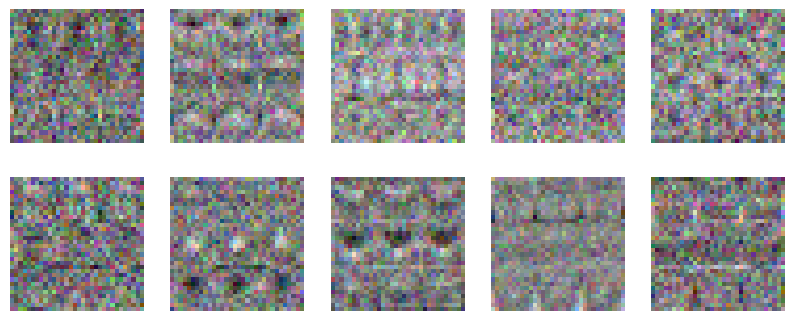

In [47]:
import matplotlib.pyplot as plt

templates = []
for i in range(10):
    im = W_star[i].reshape(32, 32, 3)
    im = (im - im.min()) / (im.max() - im.min())
    templates.append(im)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(templates[i])
    ax.axis('off')
plt.show()

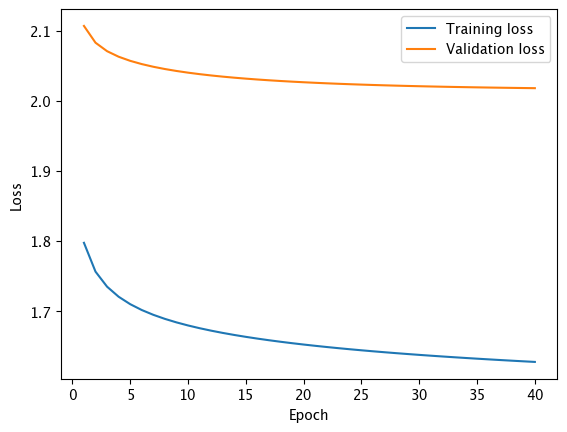

In [48]:
import matplotlib.pyplot as plt


# Plot the training and validation losses
epochs = range(1, n_epochs + 1)
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()